## Observations and Insights

#1) Pie plot indicates that both male and female mice were almost evenly distributed (male = 51%, female = 49%)

#2) "Infubinol" and "Ceftamin" has higher outliers and variance compared to "Capomulin" and "Ramicane"

#3)  The mean and median Tumor volume for "Capomulin" and "Ramicane" is much lower than "Infubinol" and "Ceftamin", and that indicates that "Capomulin" and "Ramicane" are better than "Infubinol" and "Ceftamin"

#4) Strong correlation between mouse weight and Tumor Volume


In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [199]:
# Checking the number of mice.
print(merge_df["Mouse ID"].nunique())

249


In [200]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

In [201]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [204]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
nodup_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
nodup_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [205]:
# Checking the number of mice in the clean DataFrame.
print(nodup_df['Mouse ID'].nunique())

248


## Summary Statistics

In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
nodup_gpdf = nodup_df.groupby("Drug Regimen")

Summarystat_df = pd.DataFrame({"Tumor Volume Mean": nodup_gpdf["Tumor Volume (mm3)"].mean(),
                       "Tumor Volume Median": nodup_gpdf["Tumor Volume (mm3)"].median(),
                        "Tumor Volume Variance": nodup_gpdf["Tumor Volume (mm3)"].var(),
                        "Tumor Volume std. dev.": nodup_gpdf["Tumor Volume (mm3)"].std(),
                         "Tumor SEM": nodup_gpdf["Tumor Volume (mm3)"].sem(),  
                      })
Summarystat_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume std. dev.,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summaryagg_df = nodup_df.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']
    })
summaryagg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

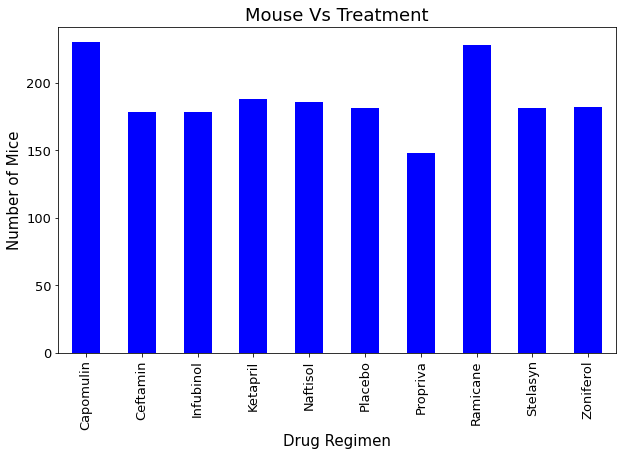

In [208]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = nodup_gpdf["Mouse ID"].count()

bar_plt = mouse_count.plot(kind='bar', figsize=(10,6), color="blue", fontsize=13);
bar_plt.set_alpha(0.8)
bar_plt.set_title("Mouse Vs Treatment", fontsize=18)
bar_plt.set_xlabel("Drug Regimen", fontsize=15);
bar_plt.set_ylabel("Number of Mice", fontsize=15);

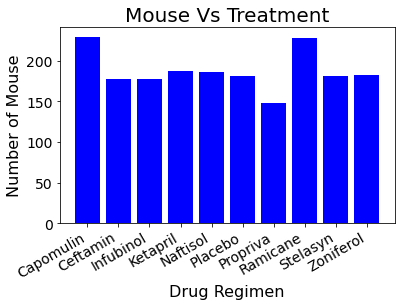

In [209]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

fig, bar_plt= plt.subplots()
bar_plt.bar(mouse_count.index.values, mouse_count.values, color="blue")
plt.title("Mouse Vs Treatment", size = 20)
plt.xlabel("Drug Regimen", size = 16)
plt.ylabel("Number of Mouse", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
fig.autofmt_xdate()

Text(0, 0.5, 'Sex')

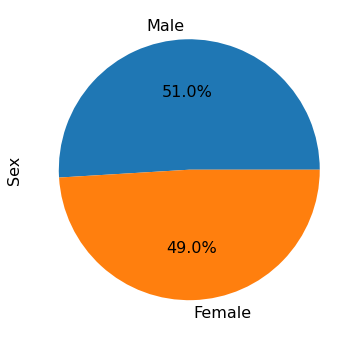

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = nodup_df["Sex"].value_counts()
pie_plot = gender_df.plot(kind='pie', figsize=(10,6), fontsize=16, autopct='%1.1f%%');
pie_plot.set_ylabel("Sex", size = 16)

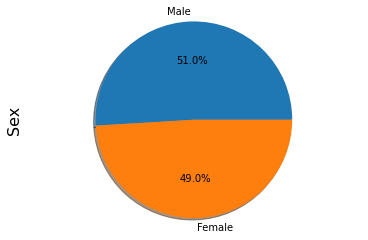

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df,autopct="%1.1f%%", labels=gender_df.index.values, shadow=True)
plt.axis("equal")
plt.ylabel("Sex", size = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_df = nodup_df.groupby("Mouse ID").max()["Timepoint"]
final_merge = pd.merge(final_df, nodup_df, on=("Mouse ID","Timepoint"),how="left")
final_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [214]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_list = {}
list = []

# Put treatments into a list for for loop (and later for plot labels)

for drug in drug_list:
    print(drug)
    volume_list[drug] = final_merge.loc[(final_merge["Drug Regimen"] == drug)]["Tumor Volume (mm3)"]
    list.append(final_merge.loc[(final_merge["Drug Regimen"] == drug)]["Tumor Volume (mm3)"])

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_list[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    print(f"The lower quartile of {drug} is: {lowerq} and the upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr} and the median of {drug} is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, Values below {lower_bound} and Values above {upper_bound} could be outliers.")
    print("\n")     

Capomulin
The lower quartile of Capomulin is: 32.37735684 and the upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004 and the median of Capomulin is: 38.125164399999996
For Capomulin, Values below 20.70456164999999 and Values above 51.83201549 could be outliers.


Ramicane
The lower quartile of Ramicane is: 31.56046955 and the upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998 and the median of Ramicane is: 36.56165229
For Ramicane, Values below 17.912664470000003 and Values above 54.30681135 could be outliers.


Infubinol
The lower quartile of Infubinol is: 54.04860769 and the upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003 and the median of Infubinol is: 60.16518046
For Infubinol, Values below 36.83290494999999 and Values above 82.74144559000001 could be outliers.


Ceftamin
The lower quartile of Ceftamin is: 48.72207785 and the u

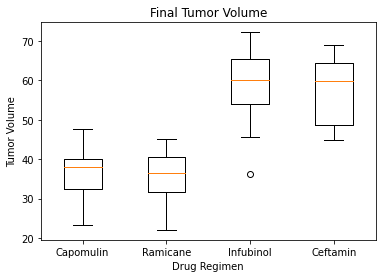

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Tumor Volume')
    
ax1.boxplot(list, labels=drug_list)
plt.savefig('Final Tumor Volume by Drugs')
plt.show()

## Line and Scatter Plots

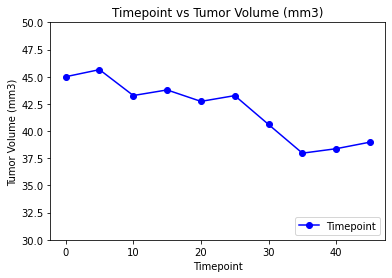

In [217]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line = nodup_df.loc[(nodup_df["Mouse ID"] == "b128") & (nodup_df["Drug Regimen"] == "Capomulin"), ["Timepoint", "Tumor Volume (mm3)"]]

# Draw a horizontal line with 0.25 transparency starting at x=0, y = 0, for a 10 unit long
plt.hlines(0, 0, 10, alpha=0.25) # 
plt.ylim(30, 50)
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(Capomulin_line["Timepoint"], Capomulin_line["Tumor Volume (mm3)"], marker ='o', color='blue', label="Timepoint")
plt.legend(loc="lower right")
plt.show()

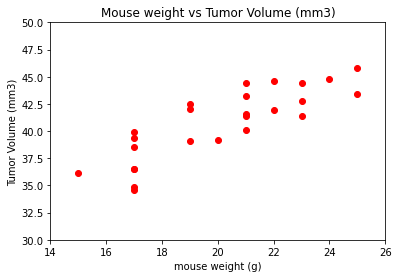

In [218]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_scatter = nodup_df.loc[(nodup_df["Drug Regimen"] == "Capomulin"), ['Mouse ID', "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_gp = Capomulin_scatter.groupby(["Mouse ID"]).mean()

# Draw a horizontal line with 0.25 transparency starting at x=0, y = 0, for a 10 unit long
plt.hlines(0, 0, 10, alpha=0.25) # 
plt.xlim(capomulin_scatter_gp["Weight (g)"].min() - 1, capomulin_scatter_gp["Weight (g)"].max() + 1)
plt.ylim(30, 50)
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.title("Mouse weight vs Tumor Volume (mm3)")
plt.xlabel("mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(capomulin_scatter_gp["Weight (g)"], capomulin_scatter_gp["Tumor Volume (mm3)"], marker="o", color="red")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


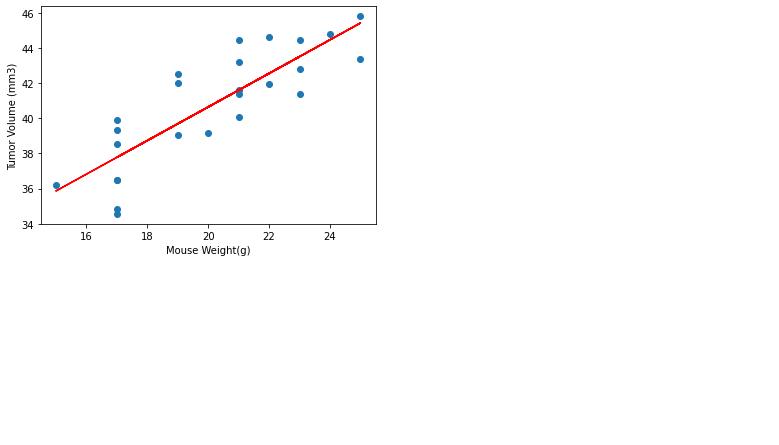

In [224]:
#Calculate the correlation coefficient and linear regression model
#For mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_scatter_gp["Weight (g)"]
y_values = capomulin_scatter_gp["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values )
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(34,22),fontsize=15,color="red") 
plt.xlabel('Mouse Weight(g)') 
plt.ylabel('Tumor Volume (mm3)') 
print(f"The r-squared is: {rvalue**2}") 
plt.show()